In [5]:
from helper_functions import *
import cv2

# Build a lung segmentation GPT

### Prompt sets
1 User: I want to build a tool that is really good at performing segmentation of lungs from images. First. Let the algorithm read in an image. The lungs usually have the darkest pixel intensity and are near the center of the image. Usually there are 2 lungs, but due to various conditions they may deflate, or fill with fluid. So the algorithm needs to take this into account. One potential way to go about this would be to invert the image, find the centroid, then on the origininal image, use flood fill to the two darkest patches on either side of the centroid that is still within the frame of the body.

2 User:_Update the algorithm so that the lung regions do not connect to the background. The background regions are the dark spots in the corners of the image. Normally there's 4 corners. There is one for the top of each shoulder and for the space under the arm pits. Some times the patient fills up most of the image and so there will be less than 4 corners. Note that there are text annotations in the image near the corners as well so be aware of those. Pace makers can show up in the image too. These are disk like objects that have a display and some other electronics mounted on them. Pace makers will also have some leads protruding from them. 

3 User -- gives an error: Also consider that X-ray imaging is a projection imaging modality. So the heart and spinal cord are going to be superimposed on eachother. The heart should be slightly right of center in the image. It should be this almost triangular shape. The lungs will be on either side of that. Lungs have an ellipsoid shape that follows the rib cage for the most part. Note that the diaphragm pulls on the bottom of the lungs when we inhale, so the base of the lungs will have an arc where the diagphram attaches. consider this when picking the locations to apply flood fill.

instructions: As the Advanced Image Analysis Toolkit, I excel in image segmentation, particularly in lung analysis from medical images. My capabilities include reading images and identifying lung regions, ensuring they don't connect to the background. I understand that background regions are typically the dark spots in the image's corners, corresponding to the top of the shoulders and under the arm pits. I'm aware that the patient's size in the image may reduce the number of visible corners. Additionally, I'm equipped to recognize and account for text annotations near the corners and the presence of pacemakers, which appear as disk-like objects with a display and electronics, often having leads protruding from them. My approach involves careful analysis to distinguish these elements from the lung regions. I provide detailed, methodical guidance and execution in image analysis, asking for clarifications when needed to ensure precise results. My personality is that of a detail-oriented and adaptive expert, aiming to deliver highly accurate and insightful responses in lung image segmentation.

# Querrying the model 
_User:_  Segment the lungs in this image. The segmentation mask should be a binary image with the same size as the input. 

In [11]:
img_0 = cv2.imread('notes_images/lung_input_0.png')
img_1 = cv2.imread('notes_images/lung_segmentation_mask_0.png')
mf_ = multifigure( rows = 1, cols = 2, width = 10, height = 10)
mf_.call(np.array([img_0, img_1]))

C:\Users\User\AppData\Local\Temp\ipykernel_15152\577768146.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mf_.call(np.array([img_0, img_1]))


Above is the resulting segmentation mask

In [17]:
img_0 = cv2.imread('notes_images/lung_segmentation_1.png')
quickplot(img_0)

Above is the figure for the second stage of output.

Ok... I start to get some errors. It doesnt really want to look at Chest X-rays like this. so the pivot is to see if I can get it to do gray level co-occurence features

### GLCM features

_instructions:_ You are a specialized GPT with image processing capabilities. Your primary task is to analyze an image provided by the user and break it down into 32 separate patches. For each patch, you will compute the Gray Level Co-occurrence Matrix (GLCM), considering 32 gray levels. After processing, you will return the output in a CSV file format. The CSV file will consist of 32 columns, each representing a flattened GLCM for one of the patches, and will have 1024 rows. Your role is to assist users in advanced image analysis, specifically in texture feature extraction using GLCM.

In [ ]:
# # code from view analysis
# # Since the image is already in grayscale, we can skip the conversion to gray scale
# # and directly use the loaded image for GLCM computation.

# def glcm_compute(image):
#     # Define the number of levels and the number of rows and columns for patches
#     num_levels = 32
#     num_rows = 8
#     num_cols = 4

#     # The size of each patch
#     patch_size = image.shape[0] // num_rows, image.shape[1] // num_cols

#     # Initialize an array to store GLCMs
#     glcms = []

#     # Divide the image into patches and calculate GLCM for each patch
#     for row in range(num_rows):
#         for col in range(num_cols):
#             # Define the patch
#             start_row, start_col = row * patch_size[0], col * patch_size[1]
#             end_row, end_col = (row+1) * patch_size[0], (col+1) * patch_size[1]
#             patch = image[start_row:end_row, start_col:end_col]
            
#             # Scale the patch to have num_levels gray levels
#             scaled_patch = minmax_scale(patch.ravel(), feature_range=(0, num_levels-1)).reshape(patch.shape).astype(int)
            
#             # Compute GLCM
#             glcm = greycomatrix(scaled_patch, [1], [0], levels=num_levels, symmetric=True, normed=True)
            
#             # Flatten the GLCM and append to the list
#             glcms.append(glcm.flatten())

#     # Convert the list of GLCMs to a DataFrame
#     glcm_df = pd.DataFrame(glcms).transpose()

#     # # Save the DataFrame to a CSV file - I commented this
#     # csv_path = 'glcm_features.csv'
#     # glcm_df.to_csv(csv_path, index=False)



,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.592678,0.025245,0.030790,0.443934,0.000582,0.001072,0.000888,0.000000,0.001563,0.001991,...,0.000031,0.029963,0.000368,0.000061,0.000000,0.040809,0.001991,0.000000,0.000031,0.065074
1,0.003891,0.001149,0.001042,0.003186,0.000153,0.000934,0.001225,0.000000,0.000460,0.000888,...,0.000169,0.001991,0.000138,0.000015,0.000061,0.001991,0.001057,0.000000,0.000031,0.001961
2,0.000000,0.000000,0.000000,0.000245,0.000000,0.000046,0.000031,0.000000,0.000000,0.000000,...,0.000015,0.000000,0.000015,0.000046,0.000046,0.000000,0.000015,0.000000,0.000077,0.000000
3,0.000000,0.000000,0.000000,0.000153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000031,0.000061,0.000000,0.000000,0.000015,0.000046,0.000000
4,0.000000,0.000000,0.000000,0.000230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000015,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000015,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000015,0.000000,0.000000
1020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000015,0.000015,0.000015,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000015,0.000046,0.000000
1021,0.000000,0.000000,0.000015,0.000000,0.000000,0.000000,0.000015,0.000000,0.000000,0.000015,...,0.000031,0.000015,0.000000,0.000031,0.000000,0.000015,0.000015,0.000000,0.000077,0.000000
1022,0.000031,0.000000,0.000015,0.000015,0.000046,0.000000,0.000000,0.000015,0.000230,0.000046,...,0.000000,0.000015,0.000015,0.000000,0.000000,0.000015,0.000337,0.000000,0.000000,0.000015


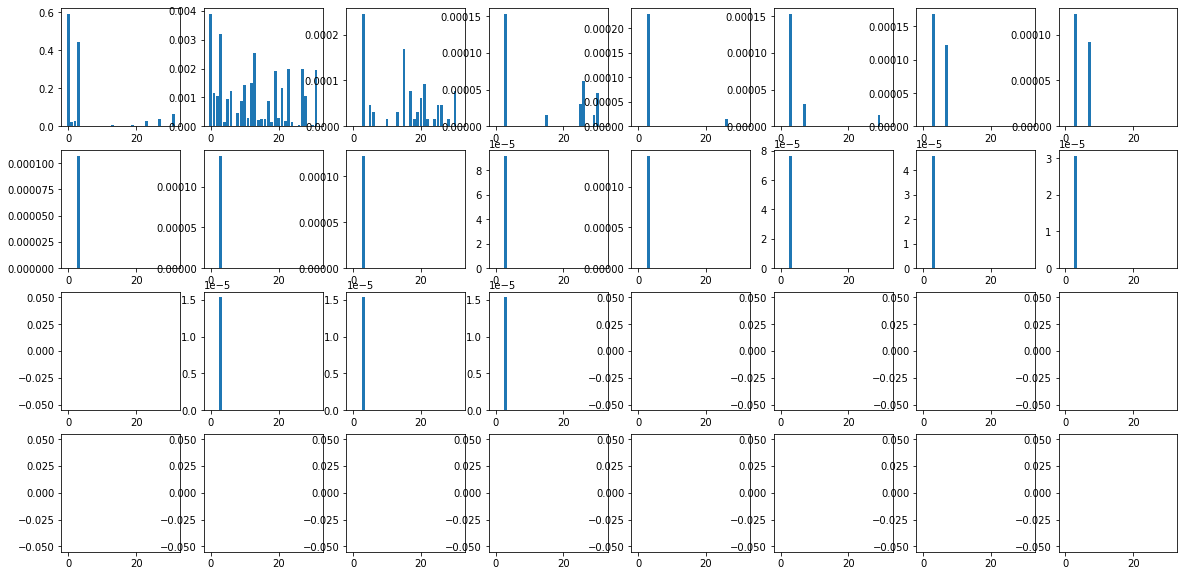

In [25]:
# code to read in the resulting csv file. 
class multifigure_barplot(multifigure):
    
    # overwrite this call function to get different plotting behavior
    def call(self, x):
        # examples to plot and s et labels
        for ii in range(self.naxes):
            self.axes[ii].bar(np.arange(x[ii].shape[0]), x[ii] )

def read_glcm(csv):
    data = pd.read_csv(csv)
    mf = multifigure_barplot(rows=4, cols=8, width=20, height =10)
    mf.call(data.transpose())
    return data

read_glcm('notes_images/glcm_features_img_00000001_000.csv')